# K-Means on digits

### We are going to use K-Means to cluster 8-bit by 8-bit images of the handwritten numbers 0 to 9. Let's see if we can group them correctly.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [2]:
x, y = digits.data, digits.target

x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Let's visualize some numbers

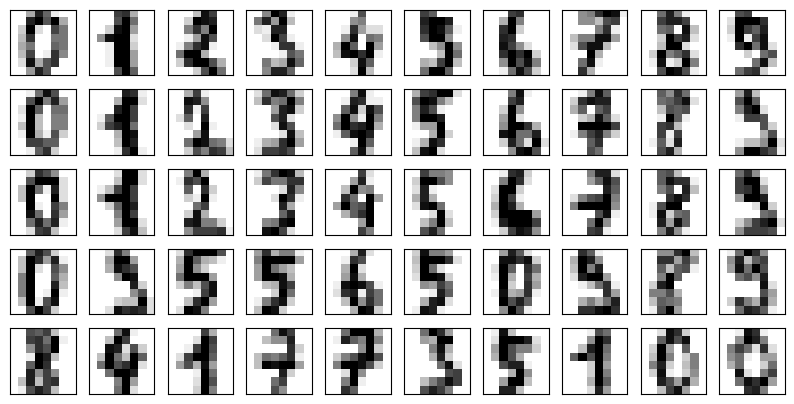

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot_digits(x, n_columns=10):
    x_reshaped = x.reshape(-1, 8, 8)
    n_rows = int(np.ceil(x.shape[0] / n_columns))

    fig, ax = plt.subplots(n_rows, n_columns, figsize=(n_columns, n_rows))

    for axi in ax.flat:
        axi.set(xticks=[], yticks=[])

    for axi, image in zip(ax.flat, x_reshaped):
        axi.imshow(image, interpolation="nearest", cmap=plt.cm.binary)


plot_digits(x[:50, :], n_columns=10)

### TODO:

Cluster the images without using the labels using $K=10$ centroids .

After the clustering finishes, graph the centroids (use the `cluster_centers_` variable of the KMeans model). Note that the centroids will be 64 element vectors that also need to be resized to `8x8` arrays to plot them as images.

* Do cluster centroids resemble digit images?
* Are the centroids that represent digits ordered? Why?

d:\AnyoneAI\environment\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


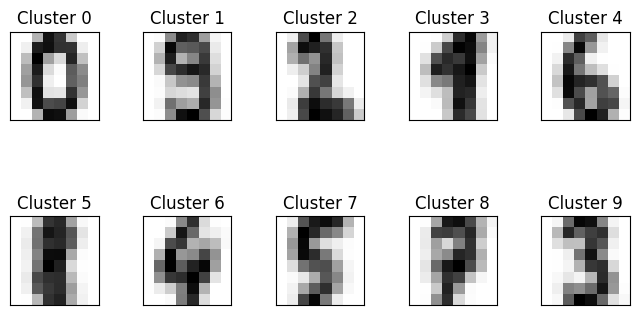

In [4]:
from sklearn.cluster import KMeans

# We perform K-Means clustering with K=10 centroids:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x)

# We reshape cluster centroids to 8x8 arrays:
cluster_centers_reshaped = kmeans.cluster_centers_.reshape(-1, 8, 8)

# We plot the cluster centroids as images
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, axi in enumerate(ax.flat):
    axi.set(xticks=[], yticks=[])
    axi.set_title(f"Cluster {i}")
    axi.imshow(cluster_centers_reshaped[i], interpolation="nearest", cmap=plt.cm.binary)

plt.show()

### TODO:

Cluster the images without using the labels using $K=2$ $K=5$ and $K=15$ centroids (hint: use a for loop). Graph the centroids in each case.

* Do cluster centroids resemble digit images?


d:\AnyoneAI\environment\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


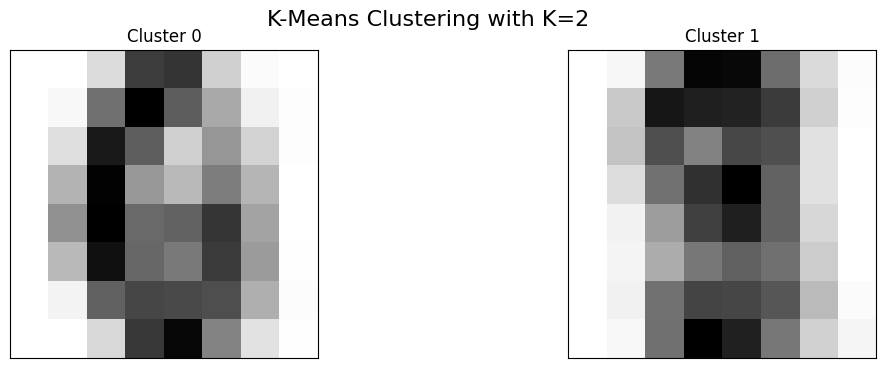

d:\AnyoneAI\environment\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


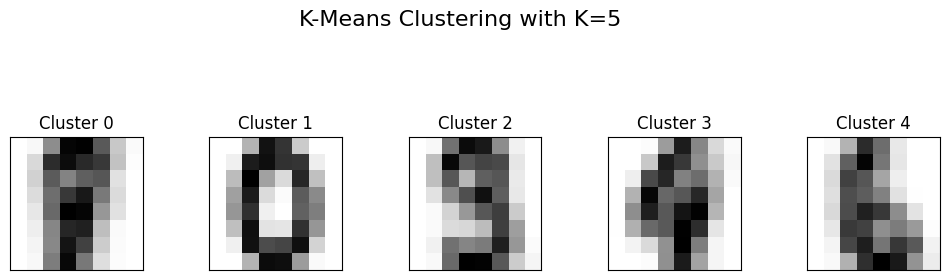

d:\AnyoneAI\environment\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


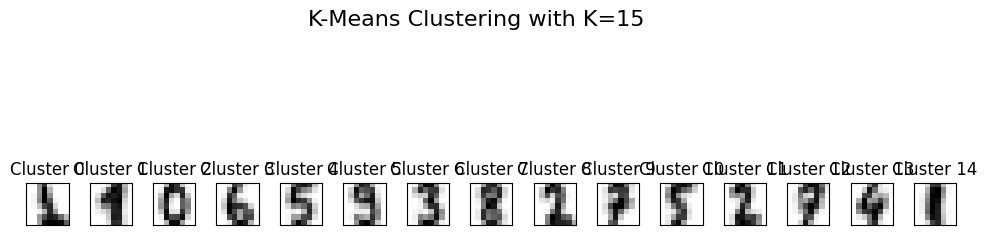

In [5]:
from sklearn.cluster import KMeans

# We define the values of K to try:
k_values = [2, 5, 15]

for k in k_values:
    # We perform K-Means clustering with the current value of K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)

    # We reshape cluster centroids to 8x8 arrays:
    cluster_centers_reshaped = kmeans.cluster_centers_.reshape(-1, 8, 8)

    # We plot the cluster centroids as images:
    fig, ax = plt.subplots(1, k, figsize=(12, 4))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for i, axi in enumerate(ax.flat):
        axi.set(xticks=[], yticks=[])
        axi.set_title(f"Cluster {i}")
        axi.imshow(
            cluster_centers_reshaped[i], interpolation="nearest", cmap=plt.cm.binary
        )

    plt.suptitle(f"K-Means Clustering with K={k}", fontsize=16)
    plt.show()

### Bonus

The clustering obtained with $K=10$ is not a classification per se, but can be used to build a classification model. 

Reorder the centroids so that each corresponds to their proper class (Hint: define a vector with the indices that will reorder the centroids and use it to index the centroid matrix).

Now use the `predict` method of the clustering model to predict the cluster for each of the training set images. Compare that prediction with the true values in the `digits.target` variable, and construct a confusion matrix. 

Analyze the resulting errors. What do they mean in terms of the centroids we found? 



d:\AnyoneAI\environment\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


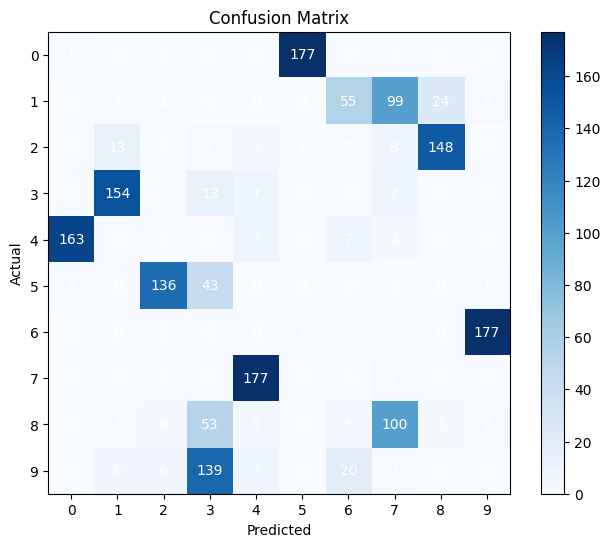

In [6]:
# We import confusion matrix:
from sklearn.metrics import confusion_matrix

# We fit K-Means clustering with K=10 centroids:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(x)

# We reorder the centroids based on true digit classes:
cluster_indices = []
for cluster in range(10):
    cluster_indices.append(
        np.argmax(np.bincount(digits.target[kmeans.labels_ == cluster]))
    )

reordered_centroids = kmeans.cluster_centers_[cluster_indices]

# We use predict method to assign clusters to training set images
predicted_clusters = kmeans.predict(x)

# Construct a confusion matrix
confusion = confusion_matrix(digits.target, predicted_clusters)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Blues, interpolation="nearest")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, confusion[i, j], ha="center", va="center", color="white")

plt.show()